## End to End Request, Download, and Calculate NDWI for AOI

This is my attempt at retreiving a scene of Lake Mead and calcualting NDWI. 

In [1]:
import requests
#set up planet API and Authentication
with open('.pl_api_key') as f:
    API_KEY = f.read()

# Setup Planet Data API base URL
URL = "https://api.planet.com/data/v1"

# Setup the session
session = requests.Session()

# Setup the stats URL
stats_url = "{}/stats".format(URL)

# Print the stats URL
print(stats_url)

# Authenticate
session.auth = (API_KEY, "")

https://api.planet.com/data/v1/stats


In [2]:
# Make a GET request to the Planet Data API
res = session.get(URL)
#Now we should get a response, hopefully it's a 200 code, saying everything is OK!
res.status_code

200

### Define AOI

In [3]:
#Define AOI
geojson_geometry = { 
    "type": "MultiPolygon", 
    "coordinates": [ 
        [ 
            [ 
                [ -114.428081320550035, 36.020196844658123 ], 
                [ -114.428460830849758, 36.019400453905305 ], 
                [ -114.428636629807841, 36.019153252864001 ], 
                [ -114.434675822825952, 36.012424403993705 ], 
                [ -114.434750088450798, 36.012358462327157 ], [ -114.444437285250913, 36.006001301374198 ], [ -114.455540128747344, 36.002687369642906 ], [ -114.461265027928917, 36.002691010068467 ], [ -114.467787042967842, 36.002335210786498 ], [ -114.478247296046305, 36.004607539107361 ], [ -114.481150550687502, 36.006127582171729 ], [ -114.481239340349603, 36.005928094662487 ], [ -114.481658739307264, 36.006114764453876 ], [ -114.484041490942104, 36.007641177851959 ], [ -114.487730385738359, 36.009572554752438 ], [ -114.488102336779491, 36.009836148502032 ], [ -114.487904233461336, 36.010115687510648 ], [ -114.491790831612775, 36.012605479314608 ], [ -114.491872029529304, 36.012676800147837 ], [ -114.496049055785392, 36.017631073065061 ], [ -114.498135951289356, 36.019474141621728 ], [ -114.499082120801148, 36.021228520373839 ], [ -114.499279171567565, 36.021462237668281 ], [ -114.499916168268314, 36.021915693693465 ], [ -114.499956828684887, 36.021959549943396 ], [ -114.502759166476238, 36.026188888272394 ], [ -114.505787718790472, 36.029796406195842 ], [ -114.505875732332001, 36.029939135362284 ], [ -114.50701396361039, 36.032610304226246 ], [ -114.507102512668411, 36.032743944048775 ], [ -114.507155210595343, 36.032941778642311 ], [ -114.508587156474704, 36.036302228596959 ], [ -114.508892035534657, 36.036818362568937 ], [ -114.508989640797935, 36.037246767385213 ], [ -114.510554604498921, 36.040919379788953 ], [ -114.510997399387364, 36.045190225068282 ], [ -114.512895895429367, 36.053888781474264 ], [ -114.513450848777225, 36.053875231093436 ], [ -114.514672368339461, 36.054283954151046 ], [ -114.521342145930703, 36.054318931547762 ], [ -114.534841704112424, 36.05954107347835 ], [ -114.535118977028688, 36.059711468269732 ], [ -114.54636110182831, 36.070039466923909 ], [ -114.546381430994913, 36.070067014840511 ], [ -114.551942953652244, 36.080582174643808 ], [ -114.55195239147622, 36.080631779459893 ], [ -114.552777817484369, 36.081495863758384 ], [ -114.554202519115719, 36.084747923530891 ], [ -114.556112664770211, 36.087702724323243 ], [ -114.556803633951546, 36.090163510827864 ], [ -114.561185775819212, 36.095933297084684 ], [ -114.563169309308364, 36.101660548702057 ], [ -114.563695162512062, 36.102752713735065 ], [ -114.565218856059573, 36.100414131440232 ], [ -114.565083944480591, 36.100306220201993 ], [ -114.565259805938638, 36.10008635666069 ], [ -114.565818773251621, 36.099493371668046 ], [ -114.566763257552495, 36.09804376635379 ], [ -114.566939238802192, 36.097862435104055 ], [ -114.56872112503909, 36.096414388311821 ], [ -114.569711609755331, 36.09536362459356 ], [ -114.569772537880255, 36.095308691260286 ], [ -114.571034571773041, 36.094534369793948 ], [ -114.574246018443901, 36.091924593168557 ], [ -114.574922961151188, 36.091495983794204 ], [ -114.575220580723894, 36.09196604210684 ], [ -114.582206945826215, 36.087679554635073 ], [ -114.596550143899321, 36.085016681065412 ], [ -114.596584027232609, 36.085016674815421 ], [ -114.600758710906689, 36.085653746028505 ], [ -114.606756394156037, 36.083951533526459 ], [ -114.611452269401454, 36.084239506269903 ], [ -114.621157660227226, 36.082890418762567 ], [ -114.621187914205635, 36.082895941736616 ], [ -114.62263035661978, 36.080616515855574 ], [ -114.632584789722017, 36.072499163331727 ], [ -114.644598777610781, 36.067955349361903 ], [ -114.644652925527339, 36.067944354570265 ], [ -114.646109675440314, 36.067759145048271 ], [ -114.648349191421246, 36.064815846320549 ], [ -114.648396597671208, 36.064771837987301 ], [ -114.652931767298313, 36.0618710661047 ], [ -114.652888185314936, 36.061810402598617 ], [ -114.653064120731329, 36.061684006765468 ], [ -114.657404889040578, 36.058968969859514 ], [ -114.657486159873798, 36.058925108401247 ], [ -114.657607412786035, 36.058880443464538 ], [ -114.660225581842681, 36.057205817858915 ], [ -114.667275762197775, 36.052069987834734 ], [ -114.668267518285106, 36.051743407306908 ], [ -114.665444644744184, 36.043408654166548 ], [ -114.665813314773644, 36.029373660067677 ], [ -114.665826863731994, 36.02930772673443 ], [ -114.666616758913548, 36.027411588028322 ], [ -114.666913795748258, 36.023647053690439 ], [ -114.667001603039751, 36.023355855774213 ], [ -114.673549546583672, 36.010572545731158 ], [ -114.673995876791309, 36.009990147815394 ], [ -114.6763480189897, 36.007195160305031 ], [ -114.676611683572673, 36.006909426972157 ], [ -114.680776208281543, 36.002998007959469 ], [ -114.680816800989817, 36.002965007959553 ], [ -114.690908792572955, 35.996978701581241 ], [ -114.691219434065985, 35.996902361043588 ], [ -114.692898388280923, 35.993297072777537 ], [ -114.701796012195558, 35.98393738974395 ], [ -114.713212069943538, 35.977900420031382 ], [ -114.724117726220626, 35.976116256076267 ], [ -114.727545941772675, 35.974825011620808 ], [ -114.727654000105858, 35.974803015787487 ], [ -114.741305502911189, 35.974403533696531 ], [ -114.754295674808191, 35.978619995349582 ], [ -114.756903608408507, 35.980631410084726 ], [ -114.757043735925876, 35.980404215891092 ], [ -114.757551000508428, 35.980717083598954 ], [ -114.757859893797232, 35.981001271115083 ], [ -114.761472487676173, 35.980717478271359 ], [ -114.761486037676178, 35.980717482438038 ], [ -114.764256176594586, 35.980842746756785 ], [ -114.76594585605163, 35.980654775215442 ], [ -114.766020241468127, 35.980660365840436 ], [ -114.770144896300494, 35.981367634825915 ], [ -114.771016611482224, 35.981397977564647 ], [ -114.771077606273792, 35.981408981731299 ], [ -114.771603663048282, 35.98161777466057 ], [ -114.771734359090487, 35.98164018556789 ], [ -114.778392433280089, 35.982697779601686 ], [ -114.778783965629188, 35.982700437222938 ], [ -114.778932776045608, 35.982722563264581 ], [ -114.78199280962248, 35.983300097214268 ], [ -114.782040148164086, 35.983310955547594 ], [ -114.782259117434307, 35.983382382761036 ], [ -114.783538300557936, 35.98346568124574 ], [ -114.788735300042603, 35.985494896891325 ], [ -114.788863727355334, 35.985536789550828 ], [ -114.789078525379992, 35.985628912341333 ], [ -114.794940759537596, 35.98791787490633 ], [ -114.794987969954192, 35.987945274906295 ], [ -114.805035882551152, 35.996227409154969 ], [ -114.805924888535671, 35.997663048380353 ], [ -114.808654080023686, 36.000853717293595 ], [ -114.808674411273657, 36.000881117293503 ], [ -114.81028439005614, 36.00367879779219 ], [ -114.810391153168936, 36.003790641485118 ], [ -114.810800195383678, 36.004034872039696 ], [ -114.81179224746063, 36.004657125221094 ], [ -114.814302325978545, 36.005790877362102 ], [ -114.814917918685936, 36.006098608611609 ], [ -114.81628360705858, 36.006929104909709 ], [ -114.816479745577681, 36.007025791179366 ], [ -114.817826246211496, 36.007577973622517 ], [ -114.817914185794677, 36.007621975705774 ], [ -114.818103293927493, 36.007717225886232 ], [ -114.81815735746909, 36.007744636302867 ], [ -114.827373318072063, 36.01418964227328 ], [ -114.827508642030153, 36.014316043314764 ], [ -114.828455150032312, 36.015523414696638 ], [ -114.828875810119769, 36.01567986438959 ], [ -114.838599368770005, 36.02332995921202 ], [ -114.838619766686676, 36.023351902961991 ], [ -114.839553967256165, 36.024813685977414 ], [ -114.841040118232655, 36.026083043462812 ], [ -114.847580352878239, 36.03676009126481 ], [ -114.847593954961596, 36.03679295376476 ], [ -114.848933047019401, 36.042996973450528 ], [ -114.849343428308472, 36.043827144293807 ], [ -114.849923432673123, 36.047585434756343 ], [ -114.850613379676844, 36.050781962409758 ], [ -114.850541708115031, 36.05126556047604 ], [ -114.8505518984269, 36.05129468237989 ], [ -114.850558698426894, 36.051344083421512 ], [ -114.850553537420467, 36.051668363793922 ], [ -114.85120292357999, 36.055876231800816 ], [ -114.851202925663358, 36.055892775550767 ], [ -114.850437382572224, 36.063686099884016 ], [ -114.850369799238976, 36.064026559258529 ], [ -114.849631522509398, 36.066214607384239 ], [ -114.850650612896388, 36.067548314943465 ], [ -114.851653521702403, 36.068713881599471 ], [ -114.852608333574238, 36.069544162685659 ], [ -114.852912651867669, 36.070045347786184 ], [ -114.853004731028022, 36.070133397863152 ], [ -114.854938316200858, 36.071530301783618 ], [ -114.858053939726048, 36.073417078472822 ], [ -114.862322100239822, 36.073963032676119 ], [ -114.862383100239725, 36.073985027467785 ], [ -114.865102170893792, 36.0753498395745 ], [ -114.871304578741487, 36.076661795809578 ], [ -114.871379111033079, 36.076694790601159 ], [ -114.872854721727052, 36.07770256272655 ], [ -114.883870875750759, 36.083840208880794 ], [ -114.884485379027311, 36.084537542637918 ], [ -114.88524180520804, 36.084915045452583 ], [ -114.894608335536418, 36.094577020275146 ], [ -114.89464219282803, 36.094626418191744 ], [ -114.895700635963095, 36.096254033413345 ], [ -114.895720969296377, 36.096287026121615 ], [ -114.896485219104051, 36.098020052258889 ], [ -114.896891137144934, 36.098549408409994 ], [ -114.896938539228216, 36.098620809451504 ], [ -114.897311173736554, 36.099286900662079 ], [ -114.898560371598251, 36.100281877395709 ], [ -114.89988509793659, 36.101143355456891 ], [ -114.899932487519834, 36.101181764831786 ], [ -114.900553670581559, 36.10186952509536 ], [ -114.902865198366214, 36.103710639650046 ], [ -114.902877730382571, 36.103698604126443 ], [ -114.902925177257501, 36.103748008293032 ], [ -114.902946237214508, 36.103775186485294 ], [ -114.902983546427407, 36.103804902993723 ], [ -114.903315563093571, 36.104161830076528 ], [ -114.903275046109954, 36.104199519325874 ], [ -114.907000715289428, 36.109007551614106 ], [ -114.908216241554456, 36.110353355638601 ], [ -114.91330488889254, 36.121615874322373 ], [ -114.914712658803012, 36.13389418213383 ], [ -114.91230516323084, 36.146016171405556 ], [ -114.906312225704042, 36.156824656897683 ], [ -114.897305941997828, 36.165287842623925 ], [ -114.886146066921157, 36.170597818810968 ], [ -114.886071619004582, 36.170619954227625 ], [ -114.872076156969271, 36.172194514690126 ], [ -114.871906947594582, 36.17218351156513 ], [ -114.86485090066337, 36.171085927904912 ], [ -114.864674698580288, 36.171042117488341 ], [ -114.863377717168319, 36.170458965943872 ], [ -114.861918392240383, 36.170454354299679 ], [ -114.861444305782797, 36.17038316784145 ], [ -114.861429183004574, 36.170379349309876 ], [ -114.860715115707279, 36.170385243156638 ], [ -114.856074114354641, 36.169027183827026 ], [ -114.853832618699585, 36.168461201716831 ], [ -114.853527833283408, 36.168351455883702 ], [ -114.853245224403722, 36.168200989258729 ], [ -114.850376271085068, 36.168081816468771 ], [ -114.848793092964911, 36.16903509417812 ], [ -114.844421214855757, 36.170150262086544 ], [ -114.842032741494137, 36.171120160582149 ], [ -114.839803898617717, 36.171328035748836 ], [ -114.838675211920531, 36.171615938373733 ], [ -114.838314594072898, 36.171741515718047 ], [ -114.83818663828032, 36.171740562535447 ], [ -114.837506755059579, 36.171913985474127 ], [ -114.834769035441823, 36.171797617087655 ], [ -114.830415514389728, 36.172203652400391 ], [ -114.828807764938091, 36.171878183492474 ], [ -114.818715778635607, 36.1716782421951 ], [ -114.805889526252031, 36.166780659010925 ], [ -114.805274391825634, 36.166252254810765 ], [ -114.803047869058432, 36.166798007548032 ], [ -114.791449584120301, 36.166206111776226 ], [ -114.788453468364366, 36.16513833723333 ], [ -114.787334392190317, 36.165466869444288 ], [ -114.7865690630248, 36.165570936110782 ], [ -114.786561253750733, 36.165513504990841 ], [ -114.786540984012234, 36.165515142757258 ], [ -114.785988949943984, 36.165555903814841 ], [ -114.785169547861912, 36.165610709023106 ], [ -114.784979779058332, 36.165622948558728 ], [ -114.784871346615347, 36.165629683354396 ], [ -114.784265528615606, 36.165728918720063 ], [ -114.78371845473626, 36.165879072497908 ], [ -114.783298642236872, 36.165906343331208 ], [ -114.780729944812848, 36.165680045081935 ], [ -114.779861981053969, 36.166289204311305 ], [ -114.774875612206557, 36.171317051648224 ], [ -114.764784600368117, 36.176841954563521 ], [ -114.753538444234977, 36.179266216178192 ], [ -114.751580632840842, 36.179116548759112 ], [ -114.748548481959716, 36.181420741190777 ], [ -114.747728117989766, 36.182162712878906 ], [ -114.747606186739972, 36.182245244128765 ], [ -114.747227537629712, 36.182424553351574 ], [ -114.74637399730149, 36.183073175811835 ], [ -114.745357518398961, 36.183383425351991 ], [ -114.745227464107785, 36.183515977766788 ], [ -114.745146258899553, 36.183576389224996 ], [ -114.737336633180263, 36.187795095435511 ], [ -114.735424801092421, 36.189745350504559 ], [ -114.725734171750062, 36.195241464337599 ], [ -114.725219426959157, 36.195444799753957 ], [ -114.714001079588911, 36.198090764579945 ], [ -114.702493986910852, 36.197427993368606 ], [ -114.691653614816758, 36.193511517855946 ], [ -114.682380069534958, 36.186666533890559 ], [ -114.682258069535152, 36.186545739099074 ], [ -114.678761770673773, 36.181835535192356 ], [ -114.677754184553535, 36.181368525987345 ], [ -114.67711419473072, 36.180782363604649 ], [ -114.672089538245345, 36.185530815737458 ], [ -114.660665581472117, 36.190910847721035 ], [ -114.660286293972703, 36.191020582095838 ], [ -114.653475850264158, 36.191908405224503 ], [ -114.650685470235345, 36.192875329458658 ], [ -114.650380665027484, 36.192930124250253 ], [ -114.649408021794926, 36.19295162327046 ], [ -114.647671107474821, 36.19377947672227 ], [ -114.6451772020703, 36.194085961490764 ], [ -114.643141185261996, 36.194660474399363 ], [ -114.641022595312194, 36.194596535664161 ], [ -114.634923180933399, 36.19534611405652 ], [ -114.622335910679013, 36.192791782209319 ], [ -114.615306715997406, 36.188741870806851 ], [ -114.611030099773515, 36.188595169965794 ], [ -114.608995714122287, 36.18793501185106 ], [ -114.602294785819524, 36.191681714434253 ], [ -114.588935457932891, 36.193966057494606 ], [ -114.587540457369414, 36.193724989937543 ], [ -114.586994641728182, 36.19411145483916 ], [ -114.586600516745904, 36.194228612357051 ], [ -114.581762497509217, 36.201240949903031 ], [ -114.569784450061476, 36.209463915423775 ], [ -114.555659435131275, 36.212866081768546 ], [ -114.555557835131452, 36.212871546351842 ], [ -114.539262115687166, 36.210343856699382 ], [ -114.539160388603989, 36.210305391074456 ], [ -114.538933204292306, 36.210219328343371 ], [ -114.532195681864707, 36.206665623756294 ], [ -114.526581160616558, 36.20846936185994 ], [ -114.520456957041645, 36.208879631456973 ], [ -114.519683805117182, 36.209059815425682 ], [ -114.518840716573663, 36.20898790583378 ], [ -114.516868843290851, 36.209120004587071 ], [ -114.516767250582674, 36.209114402503751 ], [ -114.514364984852989, 36.208606157031745 ], [ -114.507218567156457, 36.207996617281658 ], [ -114.506751014032233, 36.207881151656814 ], [ -114.501868262563349, 36.205768890012301 ], [ -114.494947468299443, 36.206200681759967 ], [ -114.494486788091848, 36.206145951551761 ], [ -114.491167186172063, 36.205250839783695 ], [ -114.48676053339733, 36.20514594446405 ], [ -114.485916521936886, 36.209926323934404 ], [ -114.482431021602835, 36.21655708685104 ], [ -114.482236630512986, 36.21726429092827 ], [ -114.481354638219585, 36.218604782257067 ], [ -114.480184636949616, 36.220830574909435 ], [ -114.479348460381701, 36.221653861048175 ], [ -114.47924022630248, 36.221818360041823 ], [ -114.476561342814861, 36.226686503157225 ], [ -114.475851580998125, 36.228869349836415 ], [ -114.474750115411538, 36.230409759022848 ], [ -114.473204310778016, 36.23402184148361 ], [ -114.469849932592524, 36.237872581957326 ], [ -114.468690742556802, 36.240062592065456 ], [ -114.467577148778204, 36.241122545278941 ], [ -114.462774334562852, 36.248859076651947 ], [ -114.460804104596221, 36.250431566240913 ], [ -114.460615598806001, 36.250988924149333 ], [ -114.455928700884044, 36.257804604946799 ], [ -114.456168882136936, 36.260317520520665 ], [ -114.455384832912202, 36.263474083736149 ], [ -114.455535884643467, 36.265115197948823 ], [ -114.456126829904548, 36.269520620971861 ], [ -114.459371240206309, 36.271684508445624 ], [ -114.459488827101566, 36.271506964493859 ], [ -114.46008603647563, 36.271902494701557 ], [ -114.459967170788985, 36.272081969494984 ], [ -114.466030203657724, 36.276125761635143 ], [ -114.466186209907491, 36.276274031426595 ], [ -114.471879069196035, 36.283030748347095 ], [ -114.472279410862058, 36.283629335846193 ], [ -114.47765134761633, 36.295454299324888 ], [ -114.477732806991213, 36.29575644411608 ], [ -114.478291954902801, 36.298111824089602 ], [ -114.478305499694471, 36.298177690756148 ], [ -114.479022701361941, 36.309098343889694 ], [ -114.476753210426551, 36.319804624942854 ], [ -114.474471018153068, 36.32415267647886 ], [ -114.475923303654469, 36.328169230916167 ], [ -114.476493633487749, 36.329155214143249 ], [ -114.47669787001486, 36.330311432259421 ], [ -114.476733629164329, 36.330410330561655 ], [ -114.47682857499754, 36.330877258685952 ], [ -114.476869665207829, 36.331283994401851 ], [ -114.47718182285189, 36.333051172527441 ], [ -114.477466464548172, 36.333697065685307 ], [ -114.477676137429157, 36.335849572389549 ], [ -114.478913599424061, 36.342855057631446 ], [ -114.47891360359074, 36.342937595131353 ], [ -114.478580498645528, 36.345133765805947 ], [ -114.478694424818428, 36.3463033345638 ], [ -114.477796754495202, 36.350301013978033 ], [ -114.477113959757148, 36.354802699714064 ], [ -114.476503230807978, 36.356061584292647 ], [ -114.475919416445535, 36.358661539530246 ], [ -114.473895013000686, 36.362047422804032 ], [ -114.473507875755857, 36.363624147174249 ], [ -114.471288939466262, 36.367289601389928 ], [ -114.471425565487721, 36.367362071876109 ], [ -114.471384756112798, 36.367439008334351 ], [ -114.470255131589269, 36.368997345527859 ], [ -114.467243339337656, 36.373972516134245 ], [ -114.466761614309277, 36.374397462391954 ], [ -114.465811773887182, 36.375957779239783 ], [ -114.461760131589372, 36.379251278677316 ], [ -114.461864296168116, 36.37936573547853 ], [ -114.461647025335125, 36.379563468811568 ], [ -114.45983168667756, 36.380818873189732 ], [ -114.455265800362312, 36.384530391360826 ], [ -114.453782007047963, 36.385057137594046 ], [ -114.453571060222885, 36.385231302678179 ], [ -114.453482734181364, 36.385280704761456 ], [ -114.453251397655791, 36.385369497181081 ], [ -114.452900709534788, 36.385612016889809 ], [ -114.449893976256206, 36.386670180991203 ], [ -114.448455625254141, 36.389582860181811 ], [ -114.440614557292079, 36.398034752413679 ], [ -114.440573753125491, 36.39806763158029 ], [ -114.439009763238644, 36.399001916456811 ], [ -114.438869663478783, 36.401058185159634 ], [ -114.435445594544277, 36.40969993721437 ], [ -114.435353229186205, 36.410962777000577 ], [ -114.435325958352905, 36.411072696792075 ], [ -114.431766501369779, 36.42032151576899 ], [ -114.431657695119938, 36.420524733477009 ], [ -114.429284238583577, 36.423796390850839 ], [ -114.429126626381446, 36.424183568234611 ], [ -114.428310006544848, 36.425139307135389 ], [ -114.425287050225421, 36.429306258238867 ], [ -114.425171526267292, 36.429426921780376 ], [ -114.423390097262839, 36.430897370408395 ], [ -114.420835053090173, 36.43388769099527 ], [ -114.419308809231381, 36.434809345911738 ], [ -114.422908950173408, 36.4408505710838 ], [ -114.4229157418401, 36.440867111708727 ], [ -114.423149435855521, 36.441746531909473 ], [ -114.423402604699916, 36.442171224706307 ], [ -114.42524454291906, 36.449309146984731 ], [ -114.43216418276981, 36.456853247647707 ], [ -114.43349817559718, 36.459658609261069 ], [ -114.434059780827994, 36.460383715568526 ], [ -114.435112439315034, 36.463053375241046 ], [ -114.437270634692837, 36.467592019184842 ], [ -114.437303393469293, 36.46781559475879 ], [ -114.43803422521232, 36.468493055203915 ], [ -114.438122499170547, 36.468586452078746 ], [ -114.441775680499376, 36.474023606607531 ], [ -114.441992831719858, 36.473870951367459 ], [ -114.442162772344602, 36.474112690950435 ], [ -114.442774250076098, 36.475008066579534 ], [ -114.442876252159266, 36.475161861370935 ], [ -114.443068818672685, 36.475454987516329 ], [ -114.4432046832558, 36.475663790641008 ], [ -114.443233395722501, 36.475726385788015 ], [ -114.444522876152178, 36.477000717116404 ], [ -114.450124768231632, 36.487355161473118 ], [ -114.452469728105171, 36.498891923410397 ], [ -114.452128734166777, 36.502475786939442 ], [ -114.452164508020886, 36.502475825953752 ], [ -114.452164364270871, 36.502607636370215 ], [ -114.451954813670739, 36.505306354994836 ], [ -114.452068772812652, 36.5072986630489 ], [ -114.451666282980923, 36.508859065397637 ], [ -114.451609861417438, 36.509222790714226 ], [ -114.451573902539806, 36.509217212724451 ], [ -114.451436695678481, 36.509749146432604 ], [ -114.451354629907087, 36.510611661838141 ], [ -114.451327426782143, 36.510721605588003 ], [ -114.450655510686403, 36.513115475838262 ], [ -114.450403370061764, 36.513917139378677 ], [ -114.450364738594146, 36.513904988941633 ], [ -114.450223229044695, 36.51445360362932 ], [ -114.45044769389628, 36.520323168092922 ], [ -114.447156689579472, 36.532182529601101 ], [ -114.440415924234358, 36.542479968474773 ], [ -114.430863559449392, 36.550240605807481 ], [ -114.419403936493296, 36.554729726712409 ], [ -114.407121960538433, 36.555522337234024 ], [ -114.406938166788706, 36.555505748692369 ], [ -114.395969770075197, 36.55292206563832 ], [ -114.394125652514376, 36.551880849458087 ], [ -114.390150512830061, 36.550497473093351 ], [ -114.390035576044951, 36.550829548696626 ], [ -114.389559438545731, 36.550664749738516 ], [ -114.389674653414843, 36.550331870694379 ], [ -114.389293161471684, 36.550199108834569 ], [ -114.389192230280841, 36.550493463015428 ], [ -114.388743313614881, 36.550339533849026 ], [ -114.383673201376581, 36.548200912382697 ], [ -114.383564386793438, 36.548145911341066 ], [ -114.381730649590281, 36.546815398348741 ], [ -114.380410939861889, 36.546194804481679 ], [ -114.380295272153688, 36.546128804481789 ], [ -114.379786307225686, 36.545659687744255 ], [ -114.379724082242362, 36.545757896323728 ], [ -114.379030275993429, 36.54531830049104 ], [ -114.379172457518507, 36.545093897930222 ], [ -114.379093599344998, 36.545021213768599 ], [ -114.377350141144035, 36.548925905881994 ], [ -114.377076503644474, 36.54928282463144 ], [ -114.376347369206357, 36.549958370072908 ], [ -114.375500043146005, 36.551187537683163 ], [ -114.374395530859744, 36.553137175911459 ], [ -114.374354604818137, 36.553197440494685 ], [ -114.37378309735989, 36.554016794610902 ], [ -114.373708314026672, 36.554121206069055 ], [ -114.372308137882314, 36.555961337512507 ], [ -114.372104093090954, 36.556213994803805 ], [ -114.371289863867872, 36.557028559158077 ], [ -114.371125674716026, 36.55727969171712 ], [ -114.370996300757881, 36.557444453175172 ], [ -114.370851032408012, 36.557594258357248 ], [ -114.370052758744976, 36.558686904485924 ], [ -114.369916758745148, 36.558862723235634 ], [ -114.368900703750498, 36.560122736877553 ], [ -114.368771489167372, 36.560276502502312 ], [ -114.367613478178455, 36.561391399279564 ], [ -114.362734059262053, 36.566949552103708 ], [ -114.36210350197139, 36.567496828144542 ], [ -114.351773505667182, 36.57399696338036 ], [ -114.350976385876749, 36.574341985254826 ], [ -114.341417332414551, 36.57712908370511 ], [ -114.336592816672137, 36.577293796205417 ], [ -114.335729693581143, 36.577535307524535 ], [ -114.333533472682475, 36.577398244449498 ], [ -114.331466051348073, 36.57746882772777 ], [ -114.330419088849695, 36.577373649602904 ], [ -114.328004687768228, 36.577053200714587 ], [ -114.322411817856519, 36.576704157524603 ], [ -114.322037613690455, 36.576616576274716 ], [ -114.321563076043901, 36.576505450236297 ], [ -114.307690654903666, 36.570290285620693 ], [ -114.297138859863608, 36.55934807556406 ], [ -114.296839259864058, 36.558886834939756 ], [ -114.296388002370264, 36.558175841325578 ], [ -114.29614286278732, 36.557780465284566 ], [ -114.292638297695802, 36.550620744938414 ], [ -114.29259751957089, 36.550510875146898 ], [ -114.290161293495757, 36.538842922603294 ], [ -114.290598764197568, 36.534165859919383 ], [ -114.290544490583997, 36.534163096383537 ], [ -114.290557912458937, 36.533899501592288 ], [ -114.290572186894622, 36.533775992901411 ], [ -114.290524748242461, 36.533307971652214 ], [ -114.290551732617445, 36.532698366444826 ], [ -114.290695994827104, 36.532704752258979 ], [ -114.290697033559908, 36.53269576468621 ], [ -114.290535278773234, 36.530761359660858 ], [ -114.290562265231529, 36.530283633619888 ], [ -114.290826596753973, 36.529192996048387 ], [ -114.290824821948647, 36.529113613072511 ], [ -114.290886021948538, 36.528646825573205 ], [ -114.290956722350614, 36.528656095025802 ], [ -114.291213043870357, 36.527598506898457 ], [ -114.291271350021233, 36.526975147388065 ], [ -114.291284941687863, 36.526920276554812 ], [ -114.291543752148058, 36.526233997400965 ], [ -114.292134946802548, 36.523794715486034 ], [ -114.291725575337523, 36.523322721049126 ], [ -114.286772707365941, 36.510673020727609 ], [ -114.286759184449323, 36.510607174894403 ], [ -114.286607207734164, 36.507813274521425 ], [ -114.28338914695864, 36.501566404426562 ], [ -114.281234083746142, 36.490429286369469 ], [ -114.281213671246178, 36.490011883245124 ], [ -114.283031841504126, 36.475983655478892 ], [ -114.284529293374263, 36.47313794303583 ], [ -114.283367775140988, 36.470829519299002 ], [ -114.283197656391252, 36.47026945367486 ], [ -114.281471144379651, 36.45853718317224 ], [ -114.283260295203078, 36.446814301521222 ], [ -114.283294284786322, 36.446704512979757 ], [ -114.284863456863476, 36.443988764578286 ], [ -114.28381672381542, 36.44252676829278 ], [ -114.283776047773841, 36.442449830792938 ], [ -114.283406652576275, 36.44153112337321 ], [ -114.280612639205103, 36.438238849082055 ], [ -114.276008429534187, 36.427965344757624 ], [ -114.274449296354774, 36.416815782365909 ], [ -114.274449445313124, 36.416749788616009 ], [ -114.276881977451836, 36.40358777182621 ], [ -114.278034492110081, 36.395769588088591 ], [ -114.279764835717955, 36.392088066219451 ], [ -114.279811208030168, 36.391860281074095 ], [ -114.279995339123573, 36.391525140067309 ], [ -114.280072239179091, 36.390975395670836 ], [ -114.284259259188758, 36.38121573732176 ], [ -114.284449463355116, 36.380897278988904 ], [ -114.289123812973529, 36.375869499218531 ], [ -114.289638259561244, 36.374879766224332 ], [ -114.29113614265205, 36.373593254981593 ], [ -114.293140146504697, 36.371137059238961 ], [ -114.294118198970253, 36.370497484942824 ], [ -114.295835519670007, 36.368650316678078 ], [ -114.296039318628019, 36.368507504178332 ], [ -114.298273117907797, 36.367463404820384 ], [ -114.301153915239297, 36.364989127503435 ], [ -114.301384779822229, 36.364857334795346 ], [ -114.304109667242102, 36.363965853403037 ], [ -114.304069920127816, 36.363885318002133 ], [ -114.304314380544113, 36.363764668002318 ], [ -114.30531959515325, 36.363463397594508 ], [ -114.305692736564723, 36.363230943889434 ], [ -114.306199134562121, 36.362901254938187 ], [ -114.306242296162708, 36.362888587986866 ], [ -114.306999108555075, 36.362417121032941 ], [ -114.307426328360677, 36.361565890953358 ], [ -114.307460333568926, 36.361516426370116 ], [ -114.311861891242131, 36.356760354172081 ], [ -114.313350663268167, 36.348340188657225 ], [ -114.319196030060468, 36.338264082369676 ], [ -114.319149674495122, 36.338242276969488 ], [ -114.319203960953359, 36.338126870719641 ], [ -114.319754695363542, 36.337277844591519 ], [ -114.322787402859575, 36.331673002855247 ], [ -114.324300005617999, 36.330178732663299 ], [ -114.328056596937628, 36.322413395988157 ], [ -114.329406989106147, 36.320948069354095 ], [ -114.329829865433695, 36.318753474953745 ], [ -114.329852327775271, 36.3184993316126 ], [ -114.329901262538741, 36.318382946558707 ], [ -114.330176605689644, 36.316954002685989 ], [ -114.33177076188062, 36.313936582333326 ], [ -114.331972606404136, 36.313456521041878 ], [ -114.331839466588335, 36.311793993210337 ], [ -114.332094305467891, 36.310797177824384 ], [ -114.33192447705126, 36.308971569428437 ], [ -114.331082653299021, 36.306275882580856 ], [ -114.331422544260036, 36.293192863369562 ], [ -114.331588623842592, 36.292744353685663 ], [ -114.331645941782796, 36.290717510973501 ], [ -114.332035525986868, 36.289522404921151 ], [ -114.332043765465386, 36.289145382333864 ], [ -114.33160443657944, 36.286460486406263 ], [ -114.331435955273548, 36.285939924246172 ], [ -114.331345099148152, 36.282210552990747 ], [ -114.330631743189571, 36.277837418370311 ], [ -114.332326601425606, 36.265895834762674 ], [ -114.332400996217117, 36.265648636846393 ], [ -114.33499714379829, 36.260155865734639 ], [ -114.334039051751347, 36.252630680577518 ], [ -114.335628973284983, 36.242107029323698 ], [ -114.335625066372685, 36.242057431193757 ], [ -114.335665638471937, 36.241864343359268 ], [ -114.335686491847696, 36.241726315381605 ], [ -114.335701650401305, 36.241692957959344 ], [ -114.335896862132927, 36.240763920240809 ], [ -114.335856615168439, 36.239235244671406 ], [ -114.337431944434243, 36.23345826628703 ], [ -114.337967196516885, 36.23091093283761 ], [ -114.338059789276713, 36.230657249276717 ], [ -114.338376134280125, 36.227425498862317 ], [ -114.34123121000799, 36.22044698105217 ], [ -114.341392987566749, 36.219532613588797 ], [ -114.341624133381842, 36.219126104253604 ], [ -114.341744860722216, 36.217482342275119 ], [ -114.342197207742601, 36.216489587404041 ], [ -114.342090426819595, 36.211384763804546 ], [ -114.342901607251235, 36.208879140977373 ], [ -114.338147330528642, 36.197904120180013 ], [ -114.33781085594218, 36.194055974404094 ], [ -114.336618467178795, 36.19135191739263 ], [ -114.336531687309133, 36.19051862372875 ], [ -114.335938213660299, 36.18980074488929 ], [ -114.329950996387424, 36.18586125435845 ], [ -114.32889021819004, 36.184596818203801 ], [ -114.320171726362332, 36.177253473587534 ], [ -114.320015864904235, 36.177072269421153 ], [ -114.318785337430455, 36.175018892458198 ], [ -114.314667802706325, 36.170667174145599 ], [ -114.313303556099228, 36.169709171160335 ], [ -114.312029117778252, 36.168055846824295 ], [ -114.310905379607746, 36.167043625680101 ], [ -114.310810509816193, 36.166928343388584 ], [ -114.309974191850486, 36.16552844726197 ], [ -114.304791503523475, 36.16118741112399 ], [ -114.300474162245749, 36.154376973842439 ], [ -114.298567520225888, 36.153606498363871 ], [ -114.296553273835997, 36.152971872117611 ], [ -114.296532861336033, 36.152960858576002 ], [ -114.29603752689053, 36.152584126148476 ], [ -114.294187381783431, 36.151836481114977 ], [ -114.292051809309186, 36.151166019789372 ], [ -114.284809482672898, 36.146328269676978 ], [ -114.283825184461804, 36.145861424200568 ], [ -114.283791367795217, 36.145839414825609 ], [ -114.282951215856912, 36.145086979281039 ], [ -114.282613841185309, 36.144861618780553 ], [ -114.282456863232611, 36.144674175622178 ], [ -114.280375048114706, 36.143900236393321 ], [ -114.270665747355309, 36.136273718639195 ], [ -114.263744759844926, 36.126049520569339 ], [ -114.263369543080643, 36.124769616027685 ], [ -114.261401452445142, 36.123340158158648 ], [ -114.261354258695206, 36.123290700867052 ], [ -114.254309142132783, 36.112816532346322 ], [ -114.25376728680537, 36.112224251974617 ], [ -114.253241397030351, 36.11111969593334 ], [ -114.253240077150608, 36.111118076254002 ], [ -114.251098147869172, 36.109016946213181 ], [ -114.250962882244366, 36.108841147255156 ], [ -114.248658388859084, 36.104634315721185 ], [ -114.245639007548746, 36.103794156244483 ], [ -114.235523901913595, 36.097259184272282 ], [ -114.233395840419121, 36.094706789943658 ], [ -114.231320475477148, 36.094155306306 ], [ -114.23123926922726, 36.09412231359773 ], [ -114.220781297822072, 36.087870418152477 ], [ -114.212690641911891, 36.078760168457038 ], [ -114.207717989782068, 36.067636855399954 ], [ -114.207676199056465, 36.067273788463467 ], [ -114.206581319311212, 36.06662619894351 ], [ -114.203718809542025, 36.063320388712874 ], [ -114.202436137271562, 36.062915852984176 ], [ -114.200300494323272, 36.064223784732647 ], [ -114.199975905782111, 36.064333598274189 ], [ -114.196781154057049, 36.064893333315638 ], [ -114.19106114084299, 36.067200721716524 ], [ -114.191000570630095, 36.067817798855465 ], [ -114.191077307420414, 36.068767799716746 ], [ -114.190999540378229, 36.069104716237575 ], [ -114.191021165038876, 36.069817056990061 ], [ -114.190684659823958, 36.071036234569902 ], [ -114.190054751080467, 36.077453618076639 ], [ -114.189093910730648, 36.079533590250321 ], [ -114.18904883788349, 36.079908328044013 ], [ -114.189537410938883, 36.083852639025558 ], [ -114.189537399480557, 36.083929572358777 ], [ -114.189152622422228, 36.089458427054744 ], [ -114.189111965130621, 36.089749430179317 ], [ -114.186393934747102, 36.097916792393271 ], [ -114.184803716102806, 36.104903004756444 ], [ -114.184708853602956, 36.105100605797794 ], [ -114.1790303360374, 36.113566202964144 ], [ -114.178570455352599, 36.114472273813419 ], [ -114.17865595395331, 36.114513842254986 ], [ -114.178479761245242, 36.11487623808771 ], [ -114.178425608500547, 36.114849909642743 ], [ -114.178303119935848, 36.115591181277942 ], [ -114.17824885222764, 36.1157998541943 ], [ -114.177945975375835, 36.116434837172356 ], [ -114.17790977805349, 36.116725859565769 ], [ -114.177760585345411, 36.117198185606718 ], [ -114.177605270583484, 36.117149126634892 ], [ -114.174166700091803, 36.124358108496921 ], [ -114.174047842751136, 36.124877997981876 ], [ -114.173495616296648, 36.125765039347648 ], [ -114.171722618481212, 36.129482138974879 ], [ -114.170453846450528, 36.130651034317111 ], [ -114.16705992558694, 36.136102689473539 ], [ -114.166992119337053, 36.13617955301509 ], [ -114.16196101543882, 36.140737734073213 ], [ -114.161848759481231, 36.140885825327175 ], [ -114.161695858507542, 36.140977966301783 ], [ -114.160377532824114, 36.142172369613697 ], [ -114.159829068241621, 36.142567509196375 ], [ -114.158821602759815, 36.143061564682789 ], [ -114.158348829774624, 36.143562311065864 ], [ -114.156074164883421, 36.144890549018939 ], [ -114.15603893084436, 36.144973172480171 ], [ -114.155756978045403, 36.145290000056278 ], [ -114.155280851978546, 36.147485582988949 ], [ -114.148210506922027, 36.158962046519221 ], [ -114.147740238043482, 36.159342363686015 ], [ -114.146379981765591, 36.16399282276398 ], [ -114.146285242182415, 36.164190397763655 ], [ -114.144172706986012, 36.167250741890903 ], [ -114.141490059861482, 36.174298061369058 ], [ -114.141462953611537, 36.174342009285652 ], [ -114.134702551361045, 36.182593348305943 ], [ -114.131558182513047, 36.184823537539707 ], [ -114.130207795851845, 36.185958786027712 ], [ -114.130378199320873, 36.186119341732436 ], [ -114.129938320154892, 36.186586201106664 ], [ -114.121374188500241, 36.193473955676112 ], [ -114.116737443165974, 36.195443654154218 ], [ -114.11608138420101, 36.195973522749128 ], [ -114.116061033159411, 36.195984670665794 ], [ -114.111858948233674, 36.197516048333945 ], [ -114.111258804010035, 36.197770990772817 ], [ -114.111218084218464, 36.197781992856157 ], [ -114.111075137774236, 36.197801694591661 ], [ -114.106079078876149, 36.199622422435219 ], [ -114.105872981704763, 36.199929134689512 ], [ -114.100615036290918, 36.208869486899033 ], [ -114.099793216142743, 36.209575535577144 ], [ -114.096866430624459, 36.214575904504692 ], [ -114.096554689999891, 36.214949304504124 ], [ -114.096464870348242, 36.215028875118385 ], [ -114.096252611242463, 36.215703706289275 ], [ -114.095758915138248, 36.218034170810263 ], [ -114.095271030884106, 36.218824425280964 ], [ -114.095174144326833, 36.219132454793531 ], [ -114.09498442661878, 36.219549683959563 ], [ -114.094858597125153, 36.219492468201224 ], [ -114.088558977785638, 36.229696327630037 ], [ -114.077844829013173, 36.238243374819099 ], [ -114.077594144638539, 36.238380711277166 ], [ -114.074637968440243, 36.239356984810399 ], [ -114.074276163435869, 36.239647225253705 ], [ -114.072415360140099, 36.24044568644824 ], [ -114.072387061755123, 36.240474371705439 ], [ -114.072273216002742, 36.240528241762526 ], [ -114.06424640441395, 36.245591064866169 ], [ -114.05885232566844, 36.247017743006168 ], [ -114.058379845874796, 36.248557995818338 ], [ -114.0583052302499, 36.248706330193123 ], [ -114.057281062898952, 36.250179536914366 ], [ -114.056673528903303, 36.252141625663292 ], [ -114.05028075833286, 36.261710619394464 ], [ -114.043806874555216, 36.267087808757026 ], [ -114.040362888933828, 36.274308391911354 ], [ -114.040322107683892, 36.274368921077901 ], [ -114.037820225143406, 36.276750436967056 ], [ -114.036037052351418, 36.279444541169845 ], [ -114.02852461047604, 36.286205175529879 ], [ -114.028429563601208, 36.286271055738119 ], [ -114.022266399743359, 36.289498658632304 ], [ -114.022307893299825, 36.289586069882127 ], [ -114.021683896425799, 36.289882277173298 ], [ -114.021271514550264, 36.290019672579469 ], [ -114.019686597624911, 36.29084968173926 ], [ -114.016463674663385, 36.291621525505739 ], [ -114.012478144318564, 36.292949405301194 ], [ -114.012423941193632, 36.29296039384284 ], [ -114.010900653569166, 36.292953789169992 ], [ -114.010088687218001, 36.293148243450851 ], [ -114.009600536177061, 36.293202838242458 ], [ -114.009572038272779, 36.292948028557731 ], [ -114.00357726804728, 36.29292203642369 ], [ -114.003572338985279, 36.293624832896718 ], [ -114.002724866069954, 36.293618889146707 ], [ -114.000218030671789, 36.293522636923079 ], [ -114.000125695255264, 36.293516186923135 ], [ -113.999976476199009, 36.293505747772308 ], [ -113.996896579348501, 36.292893070283263 ], [ -113.996189328118163, 36.292890003782283 ], [ -113.995565743744152, 36.292757945449161 ], [ -113.995592083196911, 36.292633569570931 ], [ -113.990075988798893, 36.29153626435938 ], [ -113.980983815613428, 36.287150959074765 ], [ -113.980882366655209, 36.287085083033148 ], [ -113.975322262936345, 36.281395385189981 ], [ -113.975078211640664, 36.281655324998113 ], [ -113.974820810599397, 36.281413657290173 ], [ -113.972306074240308, 36.278308895587237 ], [ -113.968625999619704, 36.274543046299115 ], [ -113.968592061078098, 36.27448804734091 ], [ -113.967159071886641, 36.271165410957742 ], [ -113.966919581084625, 36.270864696956579 ], [ -113.966790923793127, 36.270645039665254 ], [ -113.965172203631326, 36.266558508970569 ], [ -113.963992289124505, 36.263822670561744 ], [ -113.963939718481214, 36.263626220172497 ], [ -113.963674711981639, 36.263014032629357 ], [ -113.963625214875478, 36.262653067385088 ], [ -113.962309502211298, 36.259331492529583 ], [ -113.961437212356856, 36.247194005203333 ], [ -113.961635476891516, 36.246360991264886 ], [ -113.961192137459633, 36.243813474955807 ], [ -113.961525042384679, 36.241298028709721 ], [ -113.961502218349722, 36.240705775281192 ], [ -113.961694588993453, 36.240016926063078 ], [ -113.961758962167877, 36.239530519140942 ], [ -113.961123341830017, 36.235228357883308 ], [ -113.960614287407381, 36.233971043004736 ], [ -113.957172964739328, 36.228008122991604 ], [ -113.957133967864394, 36.227913526116787 ], [ -113.954360298856955, 36.217092726642704 ], [ -113.954634671163078, 36.207717133455397 ], [ -113.953972328188158, 36.207017917134586 ], [ -113.95144612957202, 36.205407489864534 ], [ -113.943539812998424, 36.195874491060266 ], [ -113.942321837451487, 36.192838441119903 ], [ -113.939525059714725, 36.189026545490201 ], [ -113.938345059947764, 36.185059951256278 ], [ -113.934920992031195, 36.179873914676236 ], [ -113.934193601009383, 36.177429396449348 ], [ -113.93085213224623, 36.17265270224312 ], [ -113.921786984463452, 36.171519346700968 ], [ -113.921421319880679, 36.171409539409474 ], [ -113.914805513417875, 36.167906143833065 ], [ -113.914747843622493, 36.168020090597601 ], [ -113.914639445705987, 36.167965229139362 ], [ -113.913169251828307, 36.167100448910958 ], [ -113.911188545110733, 36.166275007119388 ], [ -113.911093940944212, 36.166220149827829 ], [ -113.91019828082797, 36.165466387113206 ], [ -113.907702858885557, 36.164144938209965 ], [ -113.90759464951077, 36.164057023626746 ], [ -113.903836254801647, 36.160132234057563 ], [ -113.901365684553753, 36.158292257296289 ], [ -113.9012642678872, 36.158187866671419 ], [ -113.900579926683491, 36.157371847009543 ], [ -113.900491154592899, 36.157297138880004 ], [ -113.900433688861469, 36.157197470634969 ], [ -113.897510278751412, 36.153711548529735 ], [ -113.897300419376762, 36.153420533946836 ], [ -113.896506016953168, 36.152277518993856 ], [ -113.895741222162684, 36.151135192953973 ], [ -113.893241582506178, 36.146848343256657 ], [ -113.892821977298482, 36.146013684924661 ], [ -113.891559341410172, 36.143244305155058 ], [ -113.891065398702651, 36.142041692656896 ], [ -113.890111045957894, 36.13947066197408 ], [ -113.889880850124882, 36.138778673433471 ], [ -113.889925203514494, 36.138763918903777 ], [ -113.88883462576166, 36.135725200163634 ], [ -113.88857770180374, 36.134771735581822 ], [ -113.888545406722827, 36.134442100354967 ], [ -113.887344240726279, 36.131719617627866 ], [ -113.887030679077625, 36.131668607032772 ], [ -113.886814076994611, 36.131613603907887 ], [ -113.874742988501822, 36.126305780040767 ], [ -113.869739182680547, 36.121686680481808 ], [ -113.869710856896305, 36.121719333239824 ], [ -113.869311852730291, 36.121373203032036 ], [ -113.869350871562588, 36.1213282237835 ], [ -113.865053686865579, 36.117361418386238 ], [ -113.864938679574109, 36.117213162136423 ], [ -113.864319304145624, 36.115892753544109 ], [ -113.864253105034365, 36.115942721515445 ], [ -113.863996112326433, 36.115602249640951 ], [ -113.864102662675464, 36.115521824017634 ], [ -113.86391635708641, 36.115246433684462 ], [ -113.863797255195763, 36.115330814218396 ], [ -113.863540370821156, 36.11496822567733 ], [ -113.86365390474721, 36.114887789898788 ], [ -113.862699116290344, 36.113703469964527 ], [ -113.861080691590644, 36.111551584751354 ], [ -113.860830505132697, 36.111194519126926 ], [ -113.859384498019807, 36.108547599877852 ], [ -113.859234327400046, 36.108325622978384 ], [ -113.859196681314856, 36.108203800980036 ], [ -113.856575060873752, 36.103404918908524 ], [ -113.856494053582196, 36.103207181408806 ], [ -113.853876669723689, 36.093458792026091 ], [ -113.853849661390399, 36.093261132651399 ], [ -113.853846446159636, 36.093230403277651 ], [ -113.852995712986754, 36.093035414676031 ], [ -113.851561715072322, 36.092667995926554 ], [ -113.851570727374849, 36.092632821828751 ], [ -113.847682764634342, 36.092511136180427 ], [ -113.847601556301143, 36.09248912055542 ], [ -113.84470037997194, 36.091401815693565 ], [ -113.844049358220516, 36.091217398205465 ], [ -113.844043151391432, 36.091239359026055 ], [ -113.843150349309511, 36.090987024651419 ], [ -113.841483467802519, 36.090476432550929 ], [ -113.841066269434251, 36.090338624417583 ], [ -113.839090508336412, 36.090141242468256 ], [ -113.836994034381277, 36.089839784135414 ], [ -113.836630394642597, 36.089779890012167 ], [ -113.836375628098608, 36.089803890188861 ], [ -113.834632895387202, 36.08980753883219 ], [ -113.834401475816293, 36.089812982224814 ], [ -113.834327477128497, 36.08980817826604 ], [ -113.832706169657527, 36.089811572689435 ], [ -113.831790531675338, 36.0899404945079 ], [ -113.831262973342817, 36.089918689299608 ], [ -113.831267276206276, 36.089814585204749 ], [ -113.82903926560445, 36.089819249842051 ], [ -113.828248017689049, 36.089748051925497 ], [ -113.82542965170552, 36.089393178730397 ], [ -113.825057640247735, 36.089332849563839 ], [ -113.823040207479025, 36.088952308239612 ], [ -113.822843415683067, 36.088909931031196 ], [ -113.820584355741374, 36.088827456062859 ], [ -113.820235569176916, 36.088793072069997 ], [ -113.819680519994037, 36.088764419315545 ], [ -113.818348230683625, 36.088641896562869 ], [ -113.817813357543571, 36.088638092131632 ], [ -113.817106684458793, 36.088673489780632 ], [ -113.817109371849824, 36.088704184925 ], [ -113.816545375902592, 36.088753563342316 ], [ -113.816138080675941, 36.088807058928367 ], [ -113.816136210289358, 36.088792818509994 ], [ -113.814050347130916, 36.08913491853906 ], [ -113.813881228381177, 36.089151394580711 ], [ -113.802320770227809, 36.088595302861322 ], [ -113.802124557728106, 36.088556905986408 ], [ -113.794761988025598, 36.086364452357955 ], [ -113.794599731775818, 36.086298589858032 ], [ -113.788983365106802, 36.083486599579544 ], [ -113.788746616148856, 36.083343788121454 ], [ -113.783593009515471, 36.07964791053876 ], [ -113.782923554308184, 36.07908232199798 ], [ -113.781141386698295, 36.07748282043385 ], [ -113.780945386698562, 36.077296019392485 ], [ -113.779454089780955, 36.075661793543993 ], [ -113.778890662047402, 36.075141042326784 ], [ -113.7787013318394, 36.074959850660441 ], [ -113.778267208777621, 36.07453804974871 ], [ -113.77760461815366, 36.073884447666344 ], [ -113.774605823910264, 36.070576281793421 ], [ -113.774308011410682, 36.07020841200233 ], [ -113.773115322229884, 36.068521550651646 ], [ -113.771072251185146, 36.066504921892879 ], [ -113.770876245977078, 36.066246784393279 ], [ -113.770692972036841, 36.06589841441054 ], [ -113.769408198564037, 36.065377378863253 ], [ -113.767893592546912, 36.064911653305344 ], [ -113.767731256088851, 36.064834662680497 ], [ -113.767054346507578, 36.064408173352973 ], [ -113.76700295696746, 36.064380781593307 ], [ -113.766431768426671, 36.064074840968793 ], [ -113.766455366392634, 36.064030783767286 ], [ -113.759670385381554, 36.059755881965451 ], [ -113.759568971840025, 36.05967360384053 ], [ -113.7581864239487, 36.058037599382736 ], [ -113.756846800514978, 36.057026589194749 ], [ -113.756630530723641, 36.056845254820047 ], [ -113.750785857613096, 36.050789196685919 ], [ -113.750610265946705, 36.050563991477937 ], [ -113.748408412356355, 36.047443489016672 ], [ -113.748205669648371, 36.047124889017169 ], [ -113.745802143060672, 36.042772254369943 ], [ -113.7457654847274, 36.042694857495071 ], [ -113.745720793022926, 36.042600333626538 ], [ -113.74364892840488, 36.037255784030386 ], [ -113.743594929446672, 36.037080044447357 ], [ -113.743214883944233, 36.035005481666836 ], [ -113.743105176376602, 36.035034171366931 ], [ -113.742970187835098, 36.034517983867715 ], [ -113.742111640394029, 36.030333382054337 ], [ -113.741969894560924, 36.029388716430802 ], [ -113.741527072981697, 36.023429786243625 ], [ -113.741527217773367, 36.023182582077354 ], [ -113.741971709486265, 36.01725938927764 ], [ -113.742005555319551, 36.017034254902981 ], [ -113.742260143780385, 36.015650388690538 ], [ -113.741783369190514, 36.014238072484474 ], [ -113.741634963982406, 36.013732688110267 ], [ -113.741636103003714, 36.013732353638716 ], [ -113.741153124369291, 36.012416372032021 ], [ -113.741126120202679, 36.01231758140716 ], [ -113.740779769683712, 36.008753665659576 ], [ -113.740487953953263, 36.007884151708197 ], [ -113.740325837286875, 36.007104353792727 ], [ -113.740343947792866, 36.007100588695643 ], [ -113.740144266728166, 36.006525183366648 ], [ -113.740056467769918, 36.00611318336729 ], [ -113.739918252680212, 36.005435951430016 ], [ -113.739756446430505, 36.004606618097981 ], [ -113.739308681351261, 35.996248657366962 ], [ -113.73913126822201, 35.996248727658561 ], [ -113.73913119426372, 35.996062059950482 ], [ -113.739218940370449, 35.994573556676137 ], [ -113.739162793135819, 35.993525515183045 ], [ -113.739183059802457, 35.993289441225066 ], [ -113.739374162803585, 35.991940401672693 ], [ -113.739410094370612, 35.991330867447552 ], [ -113.739454461883497, 35.990957124592917 ], [ -113.73946700483441, 35.990841674666122 ], [ -113.739627526037381, 35.990151852976425 ], [ -113.739800819652174, 35.988928533933048 ], [ -113.739895615485324, 35.988450604767124 ], [ -113.74001776777385, 35.988474833311408 ], [ -113.741644972209258, 35.981482106541989 ], [ -113.741747971167456, 35.981199098209061 ], [ -113.744572152301387, 35.97509328668577 ], [ -113.74469235542621, 35.974882087727799 ], [ -113.75182444559168, 35.96574574285966 ], [ -113.76127655891348, 35.959037757958853 ], [ -113.772255075235293, 35.955321350143549 ], [ -113.772793658982437, 35.955222779342598 ], [ -113.773352108608819, 35.955120408066364 ], [ -113.785743322571861, 35.954801483954448 ], [ -113.797637223933478, 35.958291327284321 ], [ -113.80789167185327, 35.96525481735231 ], [ -113.815521957999749, 35.975023268068256 ], [ -113.818049654433864, 35.981905524933936 ], [ -113.818415784426094, 35.981776827970336 ], [ -113.818469849009347, 35.981930636303431 ], [ -113.819357146678527, 35.985465484649097 ], [ -113.819795365565611, 35.986658640165565 ], [ -113.819910109315416, 35.987235299539641 ], [ -113.819849861581247, 35.987247287640841 ], [ -113.819920596949075, 35.98749106901225 ], [ -113.820055718823866, 35.987990866928143 ], [ -113.820197688897849, 35.988814066953182 ], [ -113.820260806553108, 35.989065517336755 ], [ -113.820341726344623, 35.989587325669262 ], [ -113.820351532690893, 35.989702070226691 ], [ -113.820476774224275, 35.990190187460861 ], [ -113.821070682809946, 35.99155661132373 ], [ -113.82121248593468, 35.991924748823166 ], [ -113.821214713446622, 35.991931283195804 ], [ -113.821692806375026, 35.992999518165604 ], [ -113.821653178466065, 35.993017253798286 ], [ -113.823035177744003, 35.99635936366586 ], [ -113.823109245866689, 35.996331348634527 ], [ -113.823406311491212, 35.997116751758284 ], [ -113.823567113799541, 35.997645752717226 ], [ -113.823659123521765, 35.997868261227509 ], [ -113.823827930813167, 35.998401067476678 ], [ -113.823799452209045, 35.998410090261288 ], [ -113.824206478700134, 35.999749109621987 ], [ -113.827028120224895, 36.00211884904828 ], [ -113.827217301474604, 36.002338657381323 ], [ -113.828648737132681, 36.004650092979709 ], [ -113.828709491762638, 36.004715116568875 ], [ -113.830942945767063, 36.007744677705261 ], [ -113.832869689234684, 36.007859483918821 ], [ -113.833789493399905, 36.008007609960259 ], [ -113.835658202893413, 36.008354283498079 ], [ -113.835825276872527, 36.008389403416004 ], [ -113.836283241673911, 36.008420955672889 ], [ -113.837433398816913, 36.008499646624621 ], [ -113.83756658252824, 36.008497234913371 ], [ -113.83787384057716, 36.008492851564618 ], [ -113.838935462450522, 36.008481784897945 ], [ -113.842339677996492, 36.00859131470996 ], [ -113.843465259375677, 36.008675610390213 ], [ -113.846051128685104, 36.00882561415181 ], [ -113.8482990597754, 36.009019757498358 ], [ -113.84882469614557, 36.009080132197056 ], [ -113.851721897512547, 36.009319736856163 ], [ -113.851870715220613, 36.009341738939476 ], [ -113.858359839677718, 36.010862430471086 ], [ -113.858562763635774, 36.01092823880429 ], [ -113.860117745096503, 36.011490358222503 ], [ -113.860258023030411, 36.011513574900818 ], [ -113.862023233444376, 36.011809570733732 ], [ -113.863447775652432, 36.012075056278519 ], [ -113.864462511067515, 36.012283254194841 ], [ -113.865483478898454, 36.0125066688855 ], [ -113.866403157022035, 36.012720545968513 ], [ -113.868797906754025, 36.013378391848192 ], [ -113.870090109955839, 36.013423283477231 ], [ -113.87096931828782, 36.013488684518755 ], [ -113.873580705683295, 36.013814082051461 ], [ -113.873581668321435, 36.013806063823054 ], [ -113.874447417278418, 36.01391000236454 ], [ -113.874560741722135, 36.013936201546088 ], [ -113.87491465856877, 36.013980302114575 ], [ -113.875726252317492, 36.014122700031052 ], [ -113.875712265208435, 36.014202419247106 ], [ -113.88282667256496, 36.015847180463957 ], [ -113.882921471523133, 36.015880172130572 ], [ -113.884457983535896, 36.016814275437191 ], [ -113.88778260256565, 36.018244856392336 ], [ -113.890570881192758, 36.019193085083792 ], [ -113.891416084316432, 36.019517489249971 ], [ -113.892972395863794, 36.020165392324671 ], [ -113.892980327151761, 36.020144585955649 ], [ -113.893412995901045, 36.020309517205391 ], [ -113.893800918000707, 36.020487638506417 ], [ -113.894346947497041, 36.020686821075948 ], [ -113.895036656870985, 36.020994682533832 ], [ -113.895014294379976, 36.021044781756309 ], [ -113.896084253403018, 36.02153607238759 ], [ -113.896097578213571, 36.021506085300345 ], [ -113.896753379254207, 36.021797491549918 ], [ -113.896736468572996, 36.021835548531712 ], [ -113.89822676272675, 36.022519843481163 ], [ -113.898503466746803, 36.022669828427759 ], [ -113.899341692799212, 36.023029749932277 ], [ -113.899841954256758, 36.023293746806871 ], [ -113.899799407895657, 36.023374370127321 ], [ -113.900613513191274, 36.023673847896021 ], [ -113.901688534022981, 36.024267321853472 ], [ -113.904787198145954, 36.026166564361048 ], [ -113.90567959814453, 36.026770967485092 ], [ -113.906613895502517, 36.027435538446483 ], [ -113.907163934885233, 36.027816772428025 ], [ -113.908653383965543, 36.028900724250185 ], [ -113.909099519381527, 36.029241386749653 ], [ -113.909077195333367, 36.029270622572575 ], [ -113.910298490564756, 36.030148115404735 ], [ -113.910575691605985, 36.030373450821095 ], [ -113.911313798350093, 36.031047957208763 ], [ -113.91140995550542, 36.0311146024804 ], [ -113.912167010712565, 36.031707872271127 ], [ -113.91510590390574, 36.03425080971062 ], [ -113.915416913280254, 36.034547530543541 ], [ -113.915592793382046, 36.03474129062613 ], [ -113.916922700594995, 36.035782853074764 ], [ -113.917159291219633, 36.035991643699461 ], [ -113.920733212455858, 36.039572311141136 ], [ -113.920868421830633, 36.03972610697425 ], [ -113.922346530221859, 36.04150893885766 ], [ -113.922708946471644, 36.041972767870334 ], [ -113.924464818181733, 36.044056646121462 ], [ -113.924613416098182, 36.044254457579527 ], [ -113.926559735037785, 36.047091748744265 ], [ -113.926781474647484, 36.047446822987148 ], [ -113.927898491505758, 36.048864412244519 ], [ -113.928573172540013, 36.050450216898668 ], [ -113.929867171601956, 36.051944700947175 ], [ -113.929907773685244, 36.052021638447073 ], [ -113.931204568522986, 36.055088154671687 ], [ -113.933643236891967, 36.055718235763521 ], [ -113.934273956370475, 36.055809045790873 ], [ -113.934627702068624, 36.055972592978009 ], [ -113.938403247907132, 36.056948084387365 ], [ -113.938477578115368, 36.056981080220659 ], [ -113.941062782235036, 36.058947722472766 ], [ -113.944768561475456, 36.060661014744831 ], [ -113.946960033410505, 36.062595230926249 ], [ -113.94697796378145, 36.062608983668916 ], [ -113.946977015733182, 36.062610219702876 ], [ -113.953437030153452, 36.068311896381474 ], [ -113.957558204798175, 36.074920343184353 ], [ -113.958860440574583, 36.074262470368851 ], [ -113.971085185083183, 36.072325867178783 ], [ -113.971152778833101, 36.072325747387133 ], [ -113.972969913896335, 36.072667070166169 ], [ -113.983096363647107, 36.074129767041306 ], [ -113.98436061944679, 36.07471430941208 ], [ -113.984843984706714, 36.074737928435731 ], [ -113.989386108938618, 36.073333800692986 ], [ -113.989419912063568, 36.073328270484645 ], [ -113.995420298703166, 36.073341291967076 ], [ -113.995419179190449, 36.073263342638946 ], [ -113.995818379189828, 36.073257609305649 ], [ -113.997429746397813, 36.07334565268404 ], [ -114.002507509583324, 36.073356671974643 ], [ -114.011881710035397, 36.076576349877541 ], [ -114.013363601947603, 36.077001878850844 ], [ -114.013617430557233, 36.077172503228262 ], [ -114.014885401335349, 36.07760800250275 ], [ -114.014946379460255, 36.077640933752711 ], [ -114.019523049717094, 36.081142278715163 ], [ -114.023685546014377, 36.083940321616005 ], [ -114.024200214763567, 36.084417793490267 ], [ -114.025188620557003, 36.085366777005184 ], [ -114.02590675076425, 36.086080302004085 ], [ -114.02653987071389, 36.086723720039522 ], [ -114.026555520713856, 36.086739987747826 ], [ -114.026657797048998, 36.086846458550106 ], [ -114.03504489076073, 36.099944359107496 ], [ -114.035227959510451, 36.100410954940116 ], [ -114.03669173793962, 36.106390084752725 ], [ -114.036859417397679, 36.106350759455438 ], [ -114.036874396564301, 36.106414629247013 ], [ -114.037385221816024, 36.109222774480436 ], [ -114.03776573101851, 36.11077704927451 ], [ -114.037745114001098, 36.111526276256093 ], [ -114.037766232231107, 36.111688415496488 ], [ -114.037740560287887, 36.111691759202799 ], [ -114.037739575292377, 36.111727554158179 ], [ -114.038170456387689, 36.115302938356272 ], [ -114.038177267846009, 36.11543487377272 ], [ -114.038092071418262, 36.116201234618366 ], [ -114.038763151992555, 36.1253037819178 ], [ -114.038613801117108, 36.125943522643226 ], [ -114.038698748559753, 36.12706348151886 ], [ -114.037437636233079, 36.132244929029092 ], [ -114.03742148546381, 36.132708493541259 ], [ -114.037327064630617, 36.133082024790667 ], [ -114.03683625446341, 36.134715785912547 ], [ -114.036631706230907, 36.135556199496321 ], [ -114.036964233844159, 36.135392956642832 ], [ -114.037900797474066, 36.135280259462327 ], [ -114.039193867495527, 36.133834907955816 ], [ -114.039299688824258, 36.13365024833724 ], [ -114.040958432862979, 36.130277612727106 ], [ -114.041606633383168, 36.129624599563051 ], [ -114.042098248817837, 36.12876672412591 ], [ -114.045639853789751, 36.125180511244132 ], [ -114.04547009680563, 36.122695297989004 ], [ -114.045537565555563, 36.122014351115048 ], [ -114.047938347492163, 36.111783735714987 ], [ -114.048910676927946, 36.109978107265242 ], [ -114.048928260418165, 36.109720999278657 ], [ -114.053820613850419, 36.097845319141889 ], [ -114.053935626350224, 36.097658578517176 ], [ -114.054039808588627, 36.097520302839811 ], [ -114.054897253610889, 36.087922103748269 ], [ -114.055018900485734, 36.087493706873943 ], [ -114.055777947395981, 36.085107534038919 ], [ -114.055791496354274, 36.085069144455652 ], [ -114.061186983985891, 36.075762784460899 ], [ -114.061196550496248, 36.075668637897572 ], [ -114.063246928987198, 36.071009000767226 ], [ -114.063870368758359, 36.068224044425222 ], [ -114.064373226567426, 36.067343130748512 ], [ -114.064343591953104, 36.064155278044197 ], [ -114.067679876071324, 36.052839631849615 ], [ -114.074171904024027, 36.042989341824459 ], [ -114.076879241733707, 36.040745480127789 ], [ -114.077404118990884, 36.039315422813722 ], [ -114.084385717241176, 36.030174014066574 ], [ -114.084540485967636, 36.029845674812492 ], [ -114.084555189900428, 36.027281016626326 ], [ -114.083996634700341, 36.026079244619012 ], [ -114.083609911954468, 36.02373982242235 ], [ -114.083469213012265, 36.023776094271568 ], [ -114.08334040363745, 36.023276441147345 ], [ -114.082692696177716, 36.018191260900927 ], [ -114.082232499908585, 36.01540737146513 ], [ -114.082218711366934, 36.014918567299219 ], [ -114.082275643455361, 36.014916961317667 ], [ -114.082074019945992, 36.013334006124495 ], [ -114.082073754321016, 36.013086868624868 ], [ -114.083506001529088, 36.002435849868235 ], [ -114.087722249038535, 35.992550568407481 ], [ -114.094418148254505, 35.984144590397229 ], [ -114.094647826379145, 35.983924796647592 ], [ -114.095070966303922, 35.983525720124987 ], [ -114.095260100678615, 35.983349922208561 ], [ -114.106193069256022, 35.97611984194068 ], [ -114.110934715730849, 35.97488322750516 ], [ -114.111639408120965, 35.974484607158033 ], [ -114.112186599786838, 35.974286602991683 ], [ -114.112235445173823, 35.974421588982977 ], [ -114.116390724751298, 35.972715185125928 ], [ -114.126715768365187, 35.971379551114474 ], [ -114.126783376698455, 35.971379677156115 ], [ -114.137212524244831, 35.973571141915535 ], [ -114.140452225498819, 35.972235198066542 ], [ -114.152813143170462, 35.971246007672313 ], [ -114.164883030461695, 35.974090054805899 ], [ -114.175501889857912, 35.980494007370098 ], [ -114.175809416656762, 35.980752146083042 ], [ -114.17661956959563, 35.981052691756894 ], [ -114.184825752311625, 35.976824135825588 ], [ -114.192519539670656, 35.975502864855095 ], [ -114.193677457702208, 35.974588997343737 ], [ -114.205432591564744, 35.970250171718547 ], [ -114.207106872082278, 35.970184781889458 ], [ -114.208755970011495, 35.968748420880488 ], [ -114.212978321367956, 35.966734477891102 ], [ -114.213098115849633, 35.96663550607434 ], [ -114.213576395340795, 35.966449213406214 ], [ -114.218528085011542, 35.964087396528342 ], [ -114.220550153183225, 35.963732893807872 ], [ -114.220698361519979, 35.963675165791088 ], [ -114.22066934225947, 35.963568206353273 ], [ -114.220811349550928, 35.963529678228326 ], [ -114.221249514469449, 35.963460488483364 ], [ -114.224940415460566, 35.962022860890862 ], [ -114.227287265581438, 35.961899885301314 ], [ -114.230225537259642, 35.959990842309196 ], [ -114.230482203925888, 35.959880845434384 ], [ -114.233030275673983, 35.959269363525408 ], [ -114.233145312330095, 35.95920556755685 ], [ -114.233077466109307, 35.959018859849614 ], [ -114.233455718192033, 35.95888140984983 ], [ -114.234094907161946, 35.958678950006586 ], [ -114.236228328780285, 35.95749581670735 ], [ -114.249448689163117, 35.955234024245009 ], [ -114.249570438121239, 35.955233903411703 ], [ -114.253397487360658, 35.955871892427204 ], [ -114.253588611887281, 35.9558866742099 ], [ -114.253696810845398, 35.955897600251525 ], [ -114.253965432282783, 35.955966571800019 ], [ -114.262623493430965, 35.95740991563035 ], [ -114.274252259014432, 35.963725696904234 ], [ -114.281808413799951, 35.97198619918845 ], [ -114.288107704264732, 35.972092374247843 ], [ -114.288161718848002, 35.97210337320616 ], [ -114.296960357485446, 35.975235872538619 ], [ -114.298571664207245, 35.975665627838083 ], [ -114.309106173982926, 35.982507105122714 ], [ -114.311393061863711, 35.985338073564279 ], [ -114.311710253441035, 35.985307592894159 ], [ -114.312014576357214, 35.985329529352484 ], [ -114.312224202036631, 35.985377636590428 ], [ -114.312914000951366, 35.98524260145723 ], [ -114.313171006159337, 35.985242618123948 ], [ -114.325432063651448, 35.987168967671806 ], [ -114.336512404729305, 35.992760961502626 ], [ -114.342758536045423, 35.9989267741242 ], [ -114.346524852489225, 35.999795086422857 ], [ -114.354543918242953, 35.999888907404966 ], [ -114.365421254557788, 36.003218598220251 ], [ -114.365577864974199, 36.003292276345114 ], [ -114.365764126333545, 36.003379933706299 ], [ -114.373942301052807, 36.008517327267192 ], [ -114.374003306261045, 36.008566852267144 ], [ -114.380894208782067, 36.015758155367543 ], [ -114.3857948116176, 36.024428995562381 ], [ -114.385835409534209, 36.024527872645571 ], [ -114.388619342961078, 36.035591916591507 ], [ -114.388283358089168, 36.044051422085907 ], [ -114.392140972556447, 36.041521081838319 ], [ -114.403539850140348, 36.038210115121451 ], [ -114.4036616553485, 36.038193724496473 ], [ -114.409000783870255, 36.038410050607332 ], [ -114.409382605834196, 36.038133200741754 ], [ -114.413232123005244, 36.031625424765231 ], [ -114.415225514911171, 36.029862758852822 ], [ -114.415650070087224, 36.02923613427955 ], [ -114.415805750295362, 36.029071347821478 ], [ -114.41863274318338, 36.026849901665329 ], [ -114.422560675760181, 36.023376609314333 ], [ -114.422655362218407, 36.023316217647753 ], [ -114.423763246137213, 36.022818361255659 ], [ -114.425068050184763, 36.021793048476049 ], [ -114.425135648101303, 36.021754502642786 ], 
                [ -114.42718518745626, 36.020964496061673 ], 
                [ -114.428081320550035, 36.020196844658123 ] 
            ] 
        ] 
    ] 
}

### Define Filters 

In [4]:
# get images that overlap with our AOI 
geometry_filter = {
  "type": "GeometryFilter",
  "field_name": "geometry",
  "config": geojson_geometry
}

# get images acquired within a date range
date_range_filter = {
  "type": "DateRangeFilter",
  "field_name": "acquired",
  "config": {
    "gte": "2023-06-19T00:00:00.000Z",
    "lt": "2023-06-20T00:00:00.000Z"
  }
}
# only get images which have <=0% cloud coverage
cloud_cover_filter = {
  "type": "RangeFilter",
  "field_name": "cloud_cover",
  "config": {
    "lte": 0.0
  }
}

asset_filter = {
    "type": "AssetFilter",
    "config": ["ortho_analytic_4b"]
}

# combine our geo, date, cloud filters
combined_filter = {
  "type": "AndFilter",
  "config": [geometry_filter, date_range_filter, cloud_cover_filter, asset_filter]
    #"config": [geometry_filter, date_range_filter, cloud_cover_filter, asset_filter]
}


In [11]:
from requests.auth import HTTPBasicAuth
import json 

#define the product you want to use from Planet [need to be analytical]
#would like to try PSScene, REOrthoTile, REScene, SkySatScene
item_type = 'PSScene'

#API request object 
search_request = {
    "item_types" : [item_type],
    #"interval" : "day",
    "filter" : combined_filter
}
#send request 
search_result = \
  requests.post(
    'https://api.planet.com/data/v1/quick-search',
    auth=HTTPBasicAuth(API_KEY, ''),
    json=search_request)

geojson = search_result.json() #dont know what this does 
#lets look at the first result 
print(list(geojson.items())[1][1][0])

{'_links': {'_self': 'https://api.planet.com/data/v1/item-types/PSScene/items/20230619_172644_55_2439', 'assets': 'https://api.planet.com/data/v1/item-types/PSScene/items/20230619_172644_55_2439/assets/', 'thumbnail': 'https://tiles.planet.com/data/v1/item-types/PSScene/items/20230619_172644_55_2439/thumb'}, '_permissions': ['assets.basic_analytic_4b:download', 'assets.basic_analytic_4b_rpc:download', 'assets.basic_analytic_4b_xml:download', 'assets.basic_analytic_8b:download', 'assets.basic_analytic_8b_xml:download', 'assets.basic_udm2:download', 'assets.ortho_analytic_4b:download', 'assets.ortho_analytic_4b_sr:download', 'assets.ortho_analytic_4b_xml:download', 'assets.ortho_analytic_8b:download', 'assets.ortho_analytic_8b_sr:download', 'assets.ortho_analytic_8b_xml:download', 'assets.ortho_udm2:download', 'assets.ortho_visual:download'], 'assets': ['basic_analytic_4b', 'basic_analytic_4b_rpc', 'basic_analytic_4b_xml', 'basic_analytic_8b', 'basic_analytic_8b_xml', 'basic_udm2', 'orth

In [6]:
#this cell is only used when you have an interval in the search request
import geojsonio
import time

# Helper function to printformatted JSON using the json module
def p(data):
    print(json.dumps(data, indent=2))

res = session.post(stats_url, json=search_request)

    
# Print response
#p(res.json())

res_dict = res.json()
#res_dict['buckets']

In [7]:
#extract image IDs only 
image_ids = [feature['id'] for feature in geojson['features']]
print(image_ids)
len(image_ids)

['20230619_172644_55_2439', '20230619_172646_66_2439', '20230619_180655_11_2475', '20230619_180650_73_2475', '20230619_180646_36_2475', '20230619_180652_92_2475', '20230619_180648_54_2475', '20230619_172759_60_24a7', '20230619_180910_89_247d', '20230619_180913_05_247d', '20230619_180908_73_247d', '20230619_172757_23_24a7', '20230619_172801_96_24a7', '20230619_172714_14_24a9', '20230619_172711_78_24a9', '20230619_172709_43_24a9', '20230619_172319_07_2448', '20230619_172314_88_2448', '20230619_172312_78_2448', '20230619_172323_27_2448', '20230619_172316_98_2448', '20230619_172321_17_2448']


22

### Place Orders 
Once we know the id's of the scenes we want, we want to activate and download them into a single ZIP file. This follows the [Ordering and Delivery Notebook](https://github.com/planetlabs/notebooks/blob/master/jupyter-notebooks/orders_api_tutorials/ordering_and_delivery.ipynb) from Planet. 

In [53]:
import os 
import pathlib 
import time 
from planet import Session, DataClient, OrdersClient

orders_url = 'https://api.planet.com/compute/ops/orders/v2'

response = requests.get(orders_url, auth=session.auth)
print(response) #should return 200

#checking if you have orders already created. The list may be empty if you have not created an order yet. 
orders = response.json()['orders']
len(orders)

<Response [200]>


1

In [38]:
#set content type to json 
headers = {'content-type': 'application/json'}

#in the request -- delivery can be changed maybe 
request = {
    "name":"lake_mead_06-19-23_order",
    "products":[
        {
            "item_ids":
                image_ids
                ,
            'item_type': 'PSScene',
            "product_bundle": "analytic_udm2"

        }
    ], 
    "delivery": {
        "single_archive": True, 
        "archive_type": "zip",
        "archive_filename": "{{name}}_{{order_id}}.zip"
        } 
}


In [39]:
def place_order(request, auth):
    response = requests.post(orders_url, data = json.dumps(request), auth = auth, headers = headers)
    print(response)
    order_id = response.json()['id']
    print(order_id)
    order_url = orders_url + '/' + order_id
    return order_url

def poll_for_success(order_url, auth, num_loops = 100):
    count = 0 
    while(count < num_loops):
        count += 1 
        r = requests.get(order_url, auth = session.auth)
        response = r.json()
        state = response['state']
        print(state)
        end_states = ['success', 'failed', 'partial']
        if state in end_states: 
            break 
        time.sleep(10)

def download_results(results, overwrite = False):
    results_urls = [r['location'] for r in results]
    results_names = [r['name'] for r in results]
    print('{} items to download'.format(len(results_urls)))

    for url, name in zip(results_urls, results_names):
        path = pathlib.Path(os.path.join('data',name))

        if overwrite or not path.exists():
            print('downloading {} to {}'.format(name, path))
            r = requests.get(url, allow_redirects = True)
            path.parent.mkdir(parents=True, exist_ok = True)
            open(path, 'wb').write(r.content)
        else:
            print('{} already exists, skipping {}'.format(path, name))



In [40]:
#Executing the order
order_url = place_order(request, session.auth)

<Response [202]>
9850e391-9b0d-4bb0-b87c-6ca38e5686fb
queued
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


In [54]:
poll_for_success(order_url, session.auth) #when this runs and theres no return that means its ready

success


In [57]:
#view results 
r = requests.get(order_url, auth = session.auth)
response = r.json()
results = response["_links"]['results']

In [58]:
#download results 
download_results(results)

2 items to download
downloading 9850e391-9b0d-4bb0-b87c-6ca38e5686fb/lake_mead_06-19-23_order_9850e391-9b0d-4bb0-b87c-6ca38e5686fb.zip to data/9850e391-9b0d-4bb0-b87c-6ca38e5686fb/lake_mead_06-19-23_order_9850e391-9b0d-4bb0-b87c-6ca38e5686fb.zip
downloading 9850e391-9b0d-4bb0-b87c-6ca38e5686fb/manifest.json to data/9850e391-9b0d-4bb0-b87c-6ca38e5686fb/manifest.json


this below is for ordering scenes one at a time, Above is the download for all scenes for a single day at lake mead

In [15]:
#for one scene before doing a loop for all
id0 = image_ids[0]
id0_url = '{}/item-types/{}/items/{}/assets'.format(URL, item_type, id0)
print(id0_url)

#returns JSON metadata for assets in this ID 
result = \
requests.get(
    id0_url,
    auth=HTTPBasicAuth(API_KEY, '')
)

#List of asse types available for this particular satellite image 
print(result.json().keys())

#this is "inactive" if the ortho_analytic_4b asset has not yet been activated; otherwise 'active'
print(result.json()['ortho_analytic_4b']['status'])

https://api.planet.com/data/v1/item-types/PSScene/items/20230619_172644_55_2439/assets
dict_keys(['basic_analytic_4b', 'basic_analytic_4b_rpc', 'basic_analytic_4b_xml', 'basic_analytic_8b', 'basic_analytic_8b_xml', 'basic_udm2', 'ortho_analytic_4b', 'ortho_analytic_4b_sr', 'ortho_analytic_4b_xml', 'ortho_analytic_8b', 'ortho_analytic_8b_sr', 'ortho_analytic_8b_xml', 'ortho_udm2', 'ortho_visual'])
inactive


In [8]:
for id in image_ids:
    print(id)

20230619_172644_55_2439
20230619_172646_66_2439
20230619_180655_11_2475
20230619_180650_73_2475
20230619_180646_36_2475
20230619_180652_92_2475
20230619_180648_54_2475
20230619_172759_60_24a7
20230619_180910_89_247d
20230619_180913_05_247d
20230619_180908_73_247d
20230619_172757_23_24a7
20230619_172801_96_24a7
20230619_172714_14_24a9
20230619_172711_78_24a9
20230619_172709_43_24a9
20230619_172319_07_2448
20230619_172314_88_2448
20230619_172312_78_2448
20230619_172323_27_2448
20230619_172316_98_2448
20230619_172321_17_2448


### This is a work around to get the area coverage to be maximal
There is no filter that we can add in order to get the max area coverage, this feature is only available on Planet Explorer. This workflows follows the [Jupyter Notebook: calculate coverage](https://github.com/planetlabs/notebooks/blob/master/jupyter-notebooks/coverage/calculate_coverage_wgs84.ipynb) on Planet's github. 

In [30]:
import copy
import os
from shapely.geometry import shape, mapping
from IPython.display import display
import matplotlib
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from planet import Auth
from planet import Session, data_filter
import rasterio
from rasterio import features as rfeatures
from shapely.ops import transform
from shapely.geometry import shape, mapping

%matplotlib inline

#### Set coverage grid dimensions
Set the grid dimensions according to the AOI shape and the resolution of interest. 

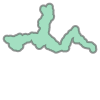

In [37]:
dimensions = (1000,1000)
aoi_shape = shape(geojson_geometry)
aoi_shape

#### Search Planet API 

In [36]:
#client wont work in we don't define the os.environ as follows 
os.environ['PL_API_KEY'] = API_KEY
client = Auth.from_key(API_KEY)

async with Session() as sess:
    cl = sess.client('data')
    items = cl.search(name='calc_coverage_search', search_filter = combined_filter, item_types = item_type)
    item_list = [i async for i in items]

In [48]:
from shapely import geometry
aoi = geometry.shape(geojson_geometry)

for item in item_list:
    g = geometry.shape(item['geometry'])
    if g.contains(aoi):
        print(item['id'])

{'buckets': [{'count': 21, 'start_time': '2023-06-01T00:00:00.000000Z'},
  {'count': 2, 'start_time': '2023-06-02T00:00:00.000000Z'},
  {'count': 14, 'start_time': '2023-06-03T00:00:00.000000Z'},
  {'count': 8, 'start_time': '2023-06-04T00:00:00.000000Z'},
  {'count': 16, 'start_time': '2023-06-05T00:00:00.000000Z'},
  {'count': 20, 'start_time': '2023-06-06T00:00:00.000000Z'},
  {'count': 0, 'start_time': '2023-06-07T00:00:00.000000Z'},
  {'count': 10, 'start_time': '2023-06-08T00:00:00.000000Z'},
  {'count': 3, 'start_time': '2023-06-09T00:00:00.000000Z'},
  {'count': 6, 'start_time': '2023-06-10T00:00:00.000000Z'},
  {'count': 0, 'start_time': '2023-06-11T00:00:00.000000Z'},
  {'count': 0, 'start_time': '2023-06-12T00:00:00.000000Z'},
  {'count': 19, 'start_time': '2023-06-13T00:00:00.000000Z'},
  {'count': 9, 'start_time': '2023-06-14T00:00:00.000000Z'},
  {'count': 0, 'start_time': '2023-06-15T00:00:00.000000Z'},
  {'count': 0, 'start_time': '2023-06-16T00:00:00.000000Z'},
  {'cou